# Preços de casas em Boston

### Introdução e objetivo

Esse dataset, coletado do repositório UCI (https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) contém características da região de Boston, informando preços de casas.
O objetivo desse trabalho é poder prever o valor de uma casa com base em suas características, fornecendo um valor coerente com o restante do dataset.
Esse trabalho é interessante a todos que tenham interesse em compra e venda de casas na região de Boston.

### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline

### Coleta de dados

In [2]:
# Conforme já dito, o arquivo csv foi coletado do repositório UCI
df = pd.read_csv('Boston_housing_prices.csv',delimiter=';')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Entendendo os atributos

In [3]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### Análise exploratória

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Verificando se existem valores missing no dataset

In [5]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D0B3B6748>,
      dtype=object)

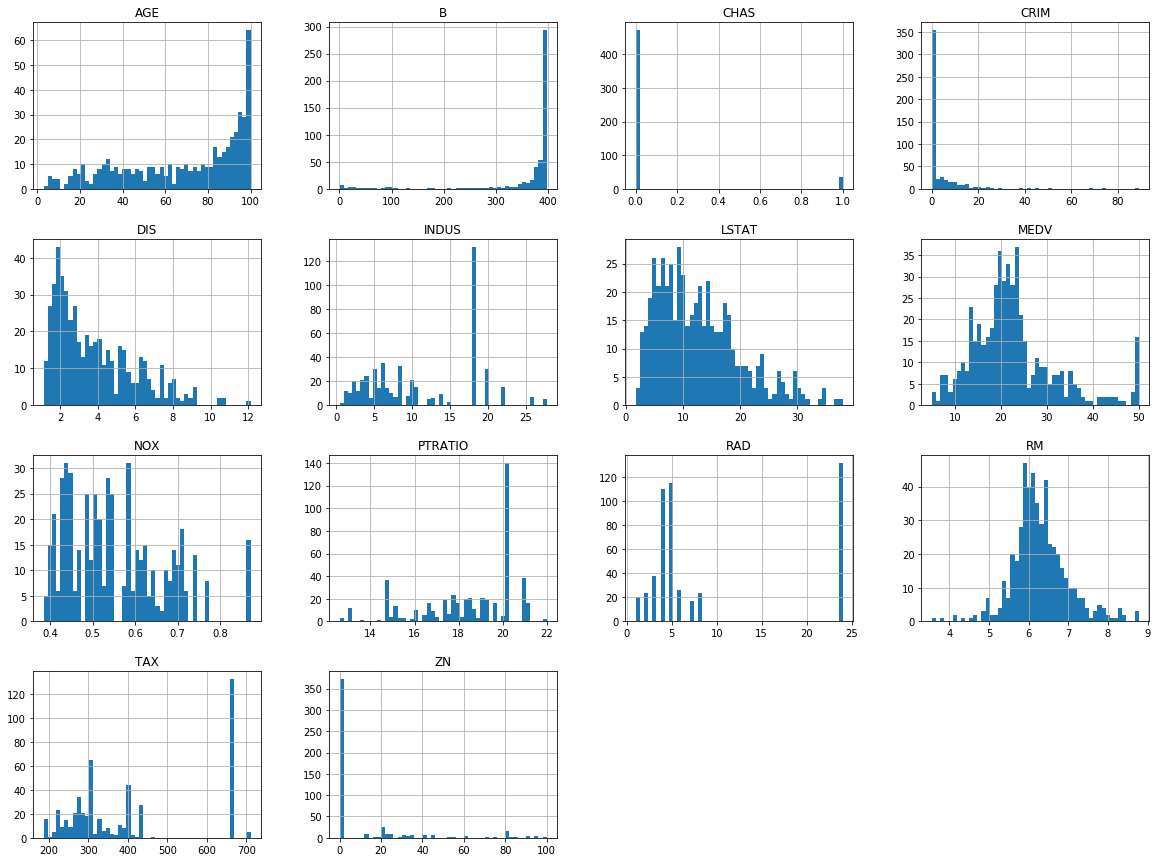

In [6]:
df.hist(bins=50,figsize=(20,15))

### Fazendo a divisão entre dados de treino e de teste.

In [7]:
# Criando array para atributos de entrada (variáveis preditoras)
X = df.iloc[:,:-1].values

# Criando array para variável de saída (target)
Y = df.iloc[:,-1].values

In [8]:
# Utilizando os arrays criados para dividirmos os dados entre treino e teste
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=13)
print('shapes das divisoes:')
print('x_train: ',x_train.shape)
print('y_train: ',y_train.shape)
print('x_test: ',x_test.shape)
print('y_test: ',y_test.shape)

shapes das divisoes:
x_train:  (404, 13)
y_train:  (404,)
x_test:  (102, 13)
y_test:  (102,)


### Verificando correlações entre variáveis

In [9]:
# Podemos verificar quais variáveis são as mais correlacionadas com a variável target
# Coeficientes mais próximos de 1 e de -1 são as mais correlacionadas
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

### Utilizando o mapa de calor para visualizar as correlações entre variáveis

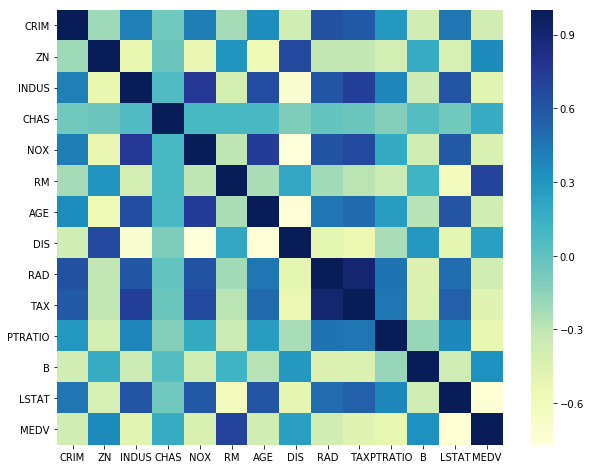

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,cmap="YlGnBu")

### Verificando graficamente as relações entre as variáveis mais impactantes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D022FEEB8>,
      dtype=object)

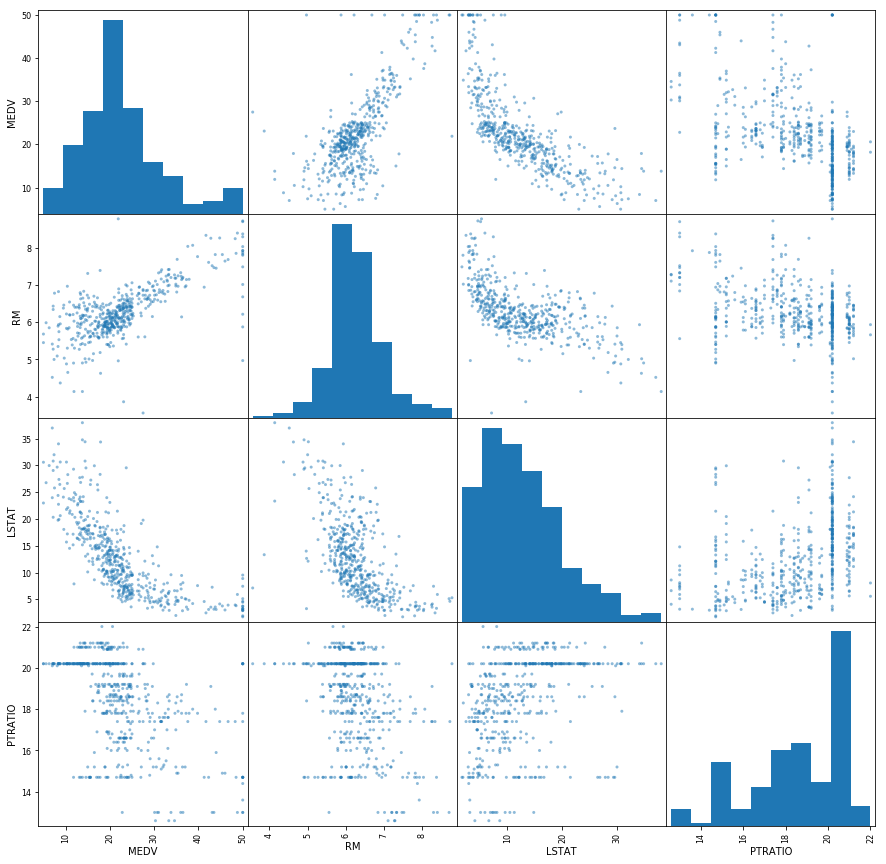

In [11]:
scatter_matrix(df[['MEDV','RM','LSTAT','PTRATIO']],figsize=(15,15))

### Normalizando (feature scaling) dos dados

In [12]:
# Nessa etapa, os dados de entrada para treino e teste estão sendo normalizados
scaler = MinMaxScaler()
x_train_scl = scaler.fit_transform(x_train)
x_test_scl = scaler.fit_transform(x_test)

In [13]:
x_train_scl.shape

(404, 13)

In [14]:
x_test_scl.shape

(102, 13)

### Selecionando um modelo de regressão

In [15]:
# O modelo será selecionado de acordo com as métricas calculadas para cada algoritmo
models = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor(n_neighbors=5)]

for model in models:
    model.fit(x_train_scl,y_train)
    y_pred = model.predict(x_test_scl)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = model.score(x_test_scl,y_test)
    cr_val = cross_val_score(model,x_test_scl,y_test)
    
    print(str(model))
    print('rmse: ',rmse)
    print('r2: ',r2)
    print('cross val score: ',np.mean(cr_val))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
rmse:  4.966918905556246
r2:  0.7278835851033557
cross val score:  0.5422133059104723
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
rmse:  5.927205471879843
r2:  0.6124920942258865
cross val score:  0.5284582066782152
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
rmse:  4.064613793968333
r2:  0.8177702937203408
cross 

### Fazendo tuning dos hiperparâmetros do algoritmo que retornou o melhor resultado

Melhor algoritmo: RandomForestRegressor

In [16]:
rf = RandomForestRegressor()
rf.fit(x_train_scl,y_train)
y_pred = rf.predict(x_test_scl)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = rf.score(x_test_scl,y_test)

print(str(model))
print('rmse: ',rmse)
print('r2: ',r2)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')
rmse:  3.778564023333649
r2:  0.8425168212651732


In [17]:
# Utilizando GridSearchCV para encontrar possíveis melhores parâmetros para nosso modelo
rf_gd = GridSearchCV(rf,
                     param_grid = {'criterion':['mse','mae'],
                                   'n_estimators':[10,50,100,150]
                                  })
rf_gd.fit(x_train_scl,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['mse', 'mae'], 'n_estimators': [10, 50, 100, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [18]:
# Verificando quais foram os melhores parâmetros
rf_gd.best_params_

{'criterion': 'mse', 'n_estimators': 10}

In [19]:
# Recalculando nosso modelo para os melhores parâmetros encontrados
rf_best = RandomForestRegressor(criterion='mse', n_estimators = 50)
rf_best.fit(x_train_scl,y_train)
y_pred_best = rf_best.predict(x_test_scl)
rmse_best = np.sqrt(mean_squared_error(y_test,y_pred_best))
r2_best = rf_best.score(x_test_scl,y_test)
cr_val_best = cross_val_score(rf_best,x_test_scl,y_test)

print('rmse: ',rmse_best)
print('r2: ',r2_best)
print('cross val score: ',np.mean(cr_val_best))

rmse:  4.035849829111243
r2:  0.820340329842
cross val score:  0.7819063989952483


In [20]:
# Criação de função para facilitar a inserção de novos valores a serem previstos
def previsao(X):
    X_scl = scaler.fit_transform(X)
    return rf_best.predict(X_scl)

In [23]:
# Exemplo de aplicação da função para previsão
ynovo = previsao(df.iloc[15:80,:-1])
ynovo

array([20.896, 23.91 , 14.12 , 19.034, 18.678, 10.004, 15.234, 11.234,
       11.002, 12.414, 11.904, 13.244, 11.428, 21.414, 20.388, 10.434,
       15.358, 10.34 , 10.082, 10.058, 38.528, 36.13 , 22.306, 21.396,
       32.31 , 43.528, 33.526, 23.562, 23.196, 21.018, 21.534, 19.232,
       17.09 , 15.662, 18.122, 20.312, 20.266, 26.728, 21.26 , 18.8  ,
       44.02 , 22.844, 44.13 , 22.916, 20.554, 19.394, 16.144, 24.   ,
       27.36 , 42.362, 23.022, 19.856, 20.704, 19.998, 20.48 , 24.534,
       20.168, 23.176, 23.19 , 23.19 , 22.412, 21.134, 21.368, 20.938,
       21.48 ])

### Conclusão

Portanto, nosso modelo escolhido para estimar preços de casas em Boston será o modelo Random Forest Regressor, entitulado como 'rf_best'.